# Data Analysis Notebook

This notebook combines data collection (scraping) and data preprocessing.

Steps:
1. **Scrape** reviews from Google Play Store
2. **Preprocess** and clean the data
3. **Visualize** the results

In [21]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Code Explanation
The following Setup is different from the demo provided because my project structure is different:
```bash
Customer-Experience-Analytics/
    scripts/         
    notebooks/        # notebook inside its own folder
    data/
    config.py
```
And since the notebook lives inside notebooks/, python's default module search cannot find:
```bash
- scripts/scraper.py or
- scripts/preprocessing.py 
```
Therefore, the import block has been modified to:
1. Detect whent he notebook is inside notebooks/,
2. Switch the working directory to the project root,
3. Add the scripts/ folder to sys.path and,
4. Import the project modules cleanly 

In [22]:
# 1. Checking location
current_dir = os.getcwd()
print("Initial working directory:", current_dir)

# 2. Detecting notebooks Location
if os.path.basename(current_dir).lower() == "notebooks":
    project_root = os.path.dirname(current_dir)
else:
    project_root = current_dir

print("Assumed project root:", project_root)

# 3. Adding scripts folder to Python path
scripts_path = os.path.join(project_root, "scripts")
print("Scripts path:", scripts_path)

if scripts_path not in sys.path:
    sys.path.append(scripts_path)

# 4. Change working direction to project root
os.chdir(project_root)
print("Final working directory:", os.getcwd())

# 5. Import project modules
from preprocessing import ReviewPreprocessor
from scraper import main as run_scraper

print("Imports successful: ReviewPreprocessor, run_scraper are ready.")


Initial working directory: c:\Users\yamis\OneDrive\Desktop\KAIM\Week2\Customer_Experience_Analutics\Customer-Experience-Analytics
Assumed project root: c:\Users\yamis\OneDrive\Desktop\KAIM\Week2\Customer_Experience_Analutics\Customer-Experience-Analytics
Scripts path: c:\Users\yamis\OneDrive\Desktop\KAIM\Week2\Customer_Experience_Analutics\Customer-Experience-Analytics\scripts
Final working directory: c:\Users\yamis\OneDrive\Desktop\KAIM\Week2\Customer_Experience_Analutics\Customer-Experience-Analytics
Imports successful: ReviewPreprocessor, run_scraper are ready.


## 1. Run Scraper

This cell runs the scraping script to fetch the latest reviews from the Google Play Store.
The output will show the progress.

In [23]:
print("🚀 Starting Scraper...")

# Run the main scraper function
raw_df = run_scraper()

print("\n✅ Scraping Finished.")
display(raw_df.head())

🚀 Starting Scraper...
Starting Google Play Store Review Scraper

[1/2] Fetching app information...

CBE: Commercial Bank of Ethiopia
App ID: com.combanketh.mobilebanking
Current Rating: 4.3214474
Total Ratings: 38836
Total Reviews: 8333

BOA: Bank of Abyssinia
App ID: com.boa.boaMobileBanking
Current Rating: 4.1912227
Total Ratings: 6326
Total Reviews: 1219

DASHEN: Dashen Bank
App ID: com.dashen.dashensuperapp
Current Rating: 4.169666
Total Ratings: 3895
Total Reviews: 769

App information saved to data/raw/app_info.csv

[2/2] Scraping reviews...


Banks:   0%|          | 0/3 [00:00<?, ?it/s]


Scraping reviews for com.combanketh.mobilebanking...
Successfully scraped 600 reviews
Collected 600 reviews for Commercial Bank of Ethiopia


Banks:  33%|███▎      | 1/3 [00:08<00:17,  8.67s/it]


Scraping reviews for com.boa.boaMobileBanking...
Successfully scraped 600 reviews
Collected 600 reviews for Bank of Abyssinia


Banks:  67%|██████▋   | 2/3 [00:12<00:05,  5.93s/it]


Scraping reviews for com.dashen.dashensuperapp...
Successfully scraped 600 reviews
Collected 600 reviews for Dashen Bank


Banks: 100%|██████████| 3/3 [00:16<00:00,  5.66s/it]


Scraping Complete!

Total reviews collected: 1800
Reviews per bank:
  Commercial Bank of Ethiopia: 600
  Bank of Abyssinia: 600
  Dashen Bank: 600

Data saved to: data/raw/reviews_raw.csv

Sample Reviews

Commercial Bank of Ethiopia:
------------------------------------------------------------

Rating: ⭐
Review: why didn't work this app?...
Date: 2025-11-27 22:40:35

Rating: ⭐⭐⭐⭐⭐
Review: The app makes our life easier. Thank you CBE!...
Date: 2025-11-27 18:00:06

Rating: ⭐
Review: this app very bad 👎...
Date: 2025-11-27 16:28:10

Bank of Abyssinia:
------------------------------------------------------------

Rating: ⭐⭐⭐⭐⭐
Review: good jop...
Date: 2025-11-27 13:19:25

Rating: ⭐⭐⭐⭐⭐
Review: ok...
Date: 2025-11-27 12:46:01

Rating: ⭐
Review: bad exprience...it is so crushed...
Date: 2025-11-27 11:41:15

Dashen Bank:
------------------------------------------------------------

Rating: ⭐⭐⭐⭐⭐
Review: clear more...
Date: 2025-11-27 20:52:14

Rating: ⭐⭐⭐⭐⭐
Review: its fast and easy to comm

,review_id,review_text,rating,review_date,user_name,thumbs_up,reply_content,bank_code,bank_name,app_id,source
0,bcb34681-1dd4-4781-b400-4393bb10b1d9,why didn't work this app?,1,2025-11-27 22:40:35,Yohannesb Adugna,0,None,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play
1,c69f051a-00f8-4144-8423-b7ebcd328d2d,The app makes our life easier. Thank you CBE!,5,2025-11-27 18:00:06,Mohammed Abrahim,0,None,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play
2,d2995fb9-63c6-4bfc-8d3c-93a0ee9dba8f,this app very bad 👎,1,2025-11-27 16:28:10,Sulxaan Huseen,0,None,CBE,Commercial Bank of Ethiopia,None,Google Play
3,f8002d06-b5c5-4ed1-9d51-a9a379304cf8,the most advanced app. but how to stay safe?,5,2025-11-27 10:03:41,Sayid Ahmad,0,None,CBE,Commercial Bank of Ethiopia,4.4.0,Google Play
4,81000db5-aa51-467e-826c-fc96160e96a8,Good application,4,2025-11-27 08:59:12,Hiwot Gebrie,0,None,CBE,Commercial Bank of Ethiopia,None,Google Play


## 2. Run Preprocessing Pipeline

Now we clean the scraped data using our `ReviewPreprocessor`.

In [24]:
# Initialize the preprocessor
preprocessor = ReviewPreprocessor()

# Run the process
success = preprocessor.process()

if success:
    print("\n✅ Preprocessing finished successfully!")
    df = preprocessor.df
else:
    print("❌ Preprocessing failed.")

STARTING DATA PREPROCESSING
Loading raw data...
Loaded 1800 reviews

[1/6] Checking for missing data...

Missing values:
  reply_content: 1798 (99.89%)
  app_id: 378 (21.00%)

[2/6] Handling missing values...

[3/6] Normalizing dates...
Date range: 2024-06-24 to 2025-11-27

[4/6] Cleaning text...

[5/6] Validating ratings...
All ratings are valid (1-5)

[6/6] Preparing final output...
Final dataset: 1800 reviews

Saving processed data...
Data saved to: data/processed/reviews_processed.csv

PREPROCESSING REPORT

Original records: 1800
Records with missing critical data: 0
Empty reviews removed: 0
Invalid ratings removed: 0
Final records: 1800

Data retention rate: 100.00%
Data error rate: 0.00%
✓ Data quality: EXCELLENT (<5% errors)

Reviews per bank:
  Bank of Abyssinia: 600
  Commercial Bank of Ethiopia: 600
  Dashen Bank: 600

Rating distribution:
  ⭐⭐⭐⭐⭐: 1119 (62.2%)
  ⭐⭐⭐⭐: 115 (6.4%)
  ⭐⭐⭐: 93 (5.2%)
  ⭐⭐: 65 (3.6%)
  ⭐: 408 (22.7%)

Date range: 2024-06-24 to 2025-11-27

Text sta

## 3. Visual Exploratory Analysis

In this section visualisations were created for the three target apps (CBE, Bank of Abyssinia, Dashen Bank). It showed the following things: 

1. Ratings distribution → overall satisfaction pattern
2. Reviews per bank → engagement / volume comparison
3. Review length distribution by bank → how detailed users are when giving feedback

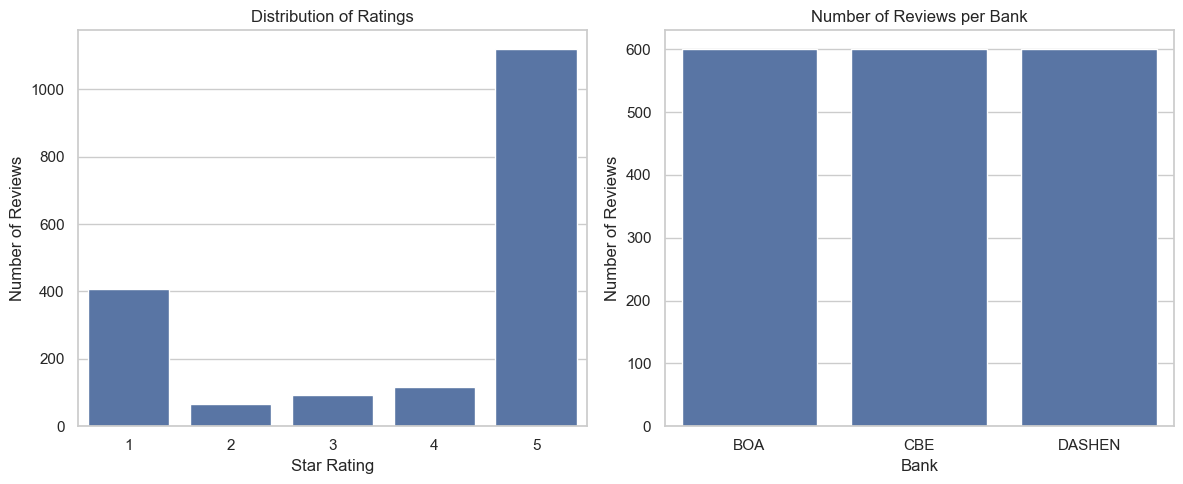

In [25]:
# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5))

# 1. Ratings Distribution
plt.subplot(1, 2, 1)
rating_order = [1, 2, 3, 4, 5]
sns.countplot(x='rating', data=df, order=rating_order)
plt.title('Distribution of Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Number of Reviews')

# 2. Reviews per Bank
plt.subplot(1, 2, 2)
sns.countplot(x='bank_code', data=df)
plt.title('Number of Reviews per Bank')
plt.xlabel('Bank')
plt.ylabel('Number of Reviews')

plt.tight_layout()
plt.show()

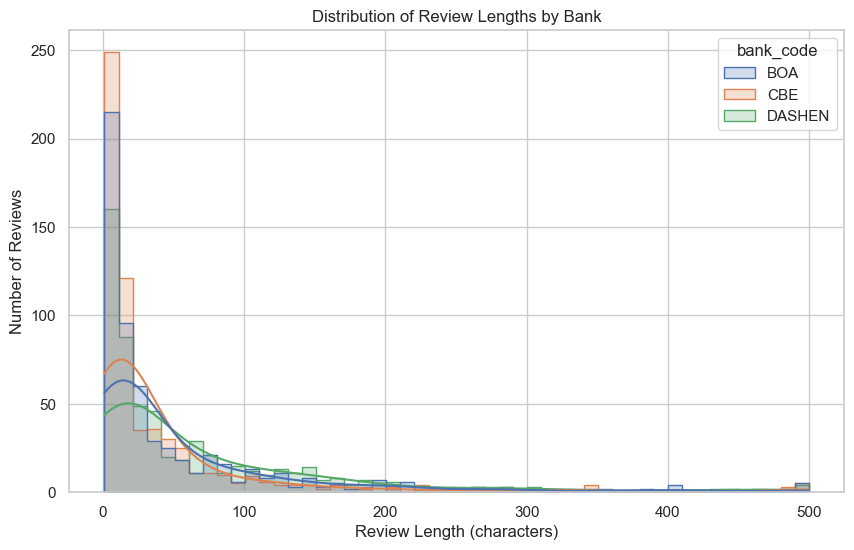

In [26]:
# 3. Review Length Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='text_length', bins=50, kde=True, hue='bank_code', element="step")
plt.title('Distribution of Review Lengths by Bank')
plt.xlabel('Review Length (characters)')
plt.ylabel('Number of Reviews')
plt.show()